<a href="https://colab.research.google.com/github/irmakbasarici/DSA-210-PROJECT/blob/main/irmakbasarici.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency, f_oneway
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv", encoding="ISO-8859-2")
df["BMI"] = df["Weight"] / (df["Height"] ** 2)
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
  le = LabelEncoder()
  df[col + "_enc"] = le.fit_transform(df[col])
  label_encoders[col] = le

df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_enc,family_history_with_overweight_enc,FAVC_enc,CAEC_enc,SMOKE_enc,SCC_enc,CALC_enc,MTRANS_enc,NObeyesdad_enc
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.700159,0.505921,0.817622,0.883941,1.859308,0.020843,0.045476,2.268593,2.365230,3.015632
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.011337,0.500083,0.386247,0.320371,0.468543,0.142893,0.208395,0.515498,1.261423,1.952090
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.325802,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,3.000000,1.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,28.719089,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,3.000000,3.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.016501,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.000000,5.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,4.000000,6.000000


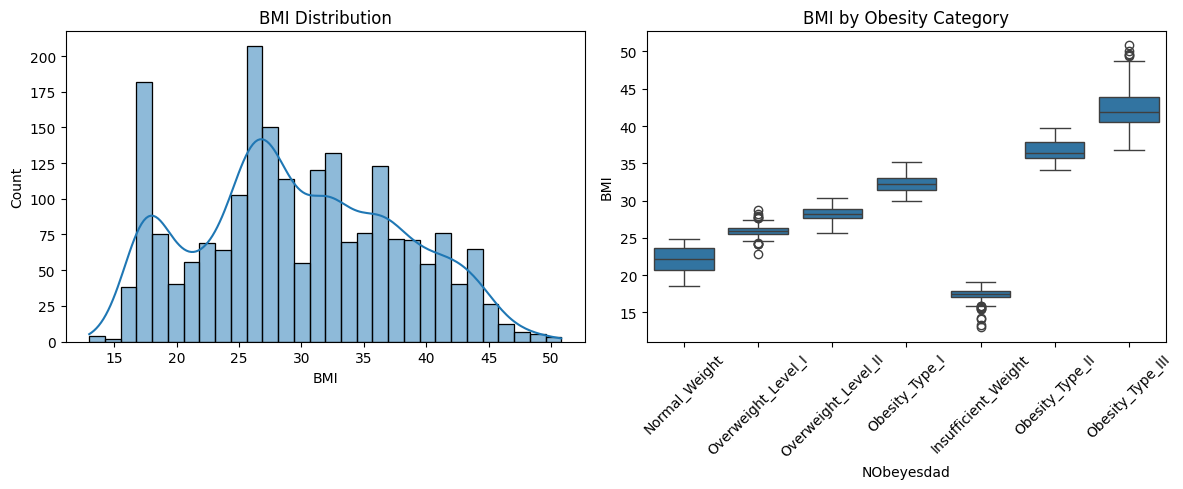

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["BMI"], bins=30, kde=True)
plt.title("BMI Distribution")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="NObeyesdad", y="BMI")
plt.xticks(rotation=45)
plt.title("BMI by Obesity Category")
plt.tight_layout()
plt.show()

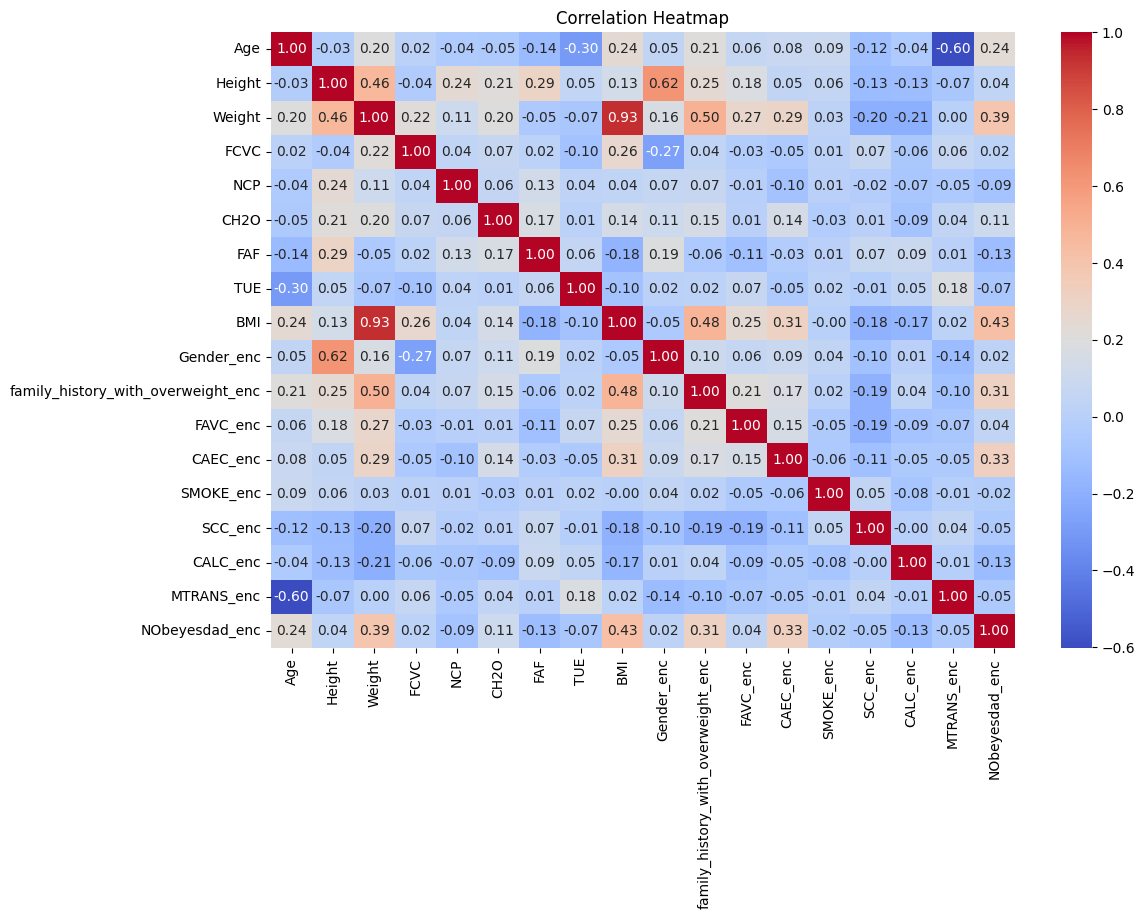

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

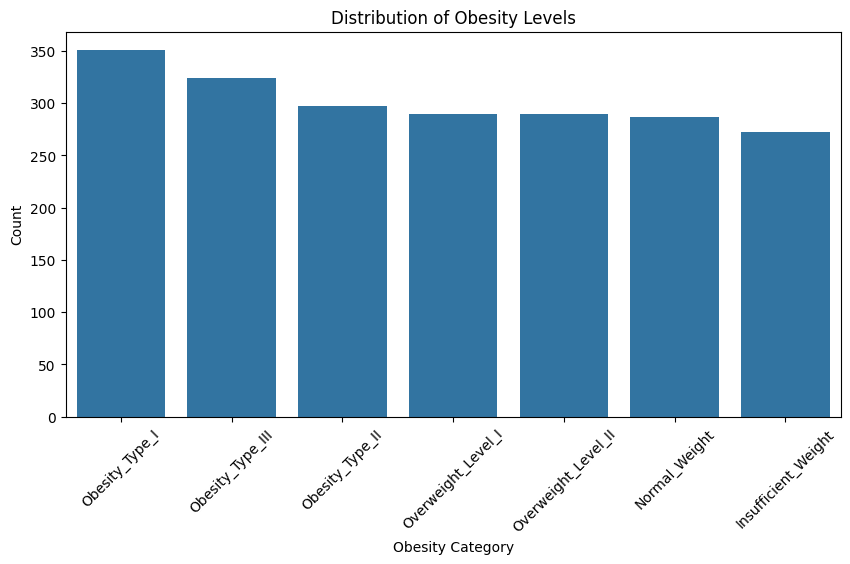

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="NObeyesdad", order=df["NObeyesdad"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Obesity Levels")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.show()

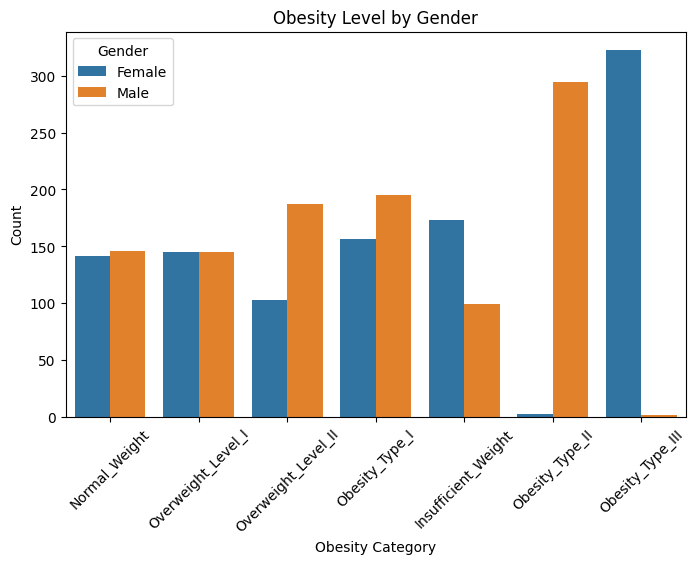

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="NObeyesdad", hue="Gender")
plt.xticks(rotation=45)
plt.title("Obesity Level by Gender")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

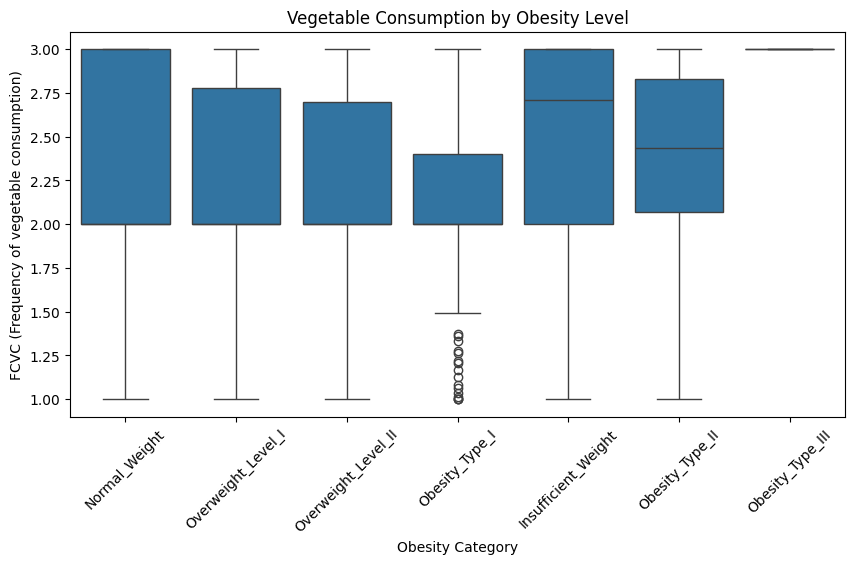

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="NObeyesdad", y="FCVC")
plt.xticks(rotation=45)
plt.title("Vegetable Consumption by Obesity Level")
plt.xlabel("Obesity Category")
plt.ylabel("FCVC (Frequency of vegetable consumption)")
plt.show()

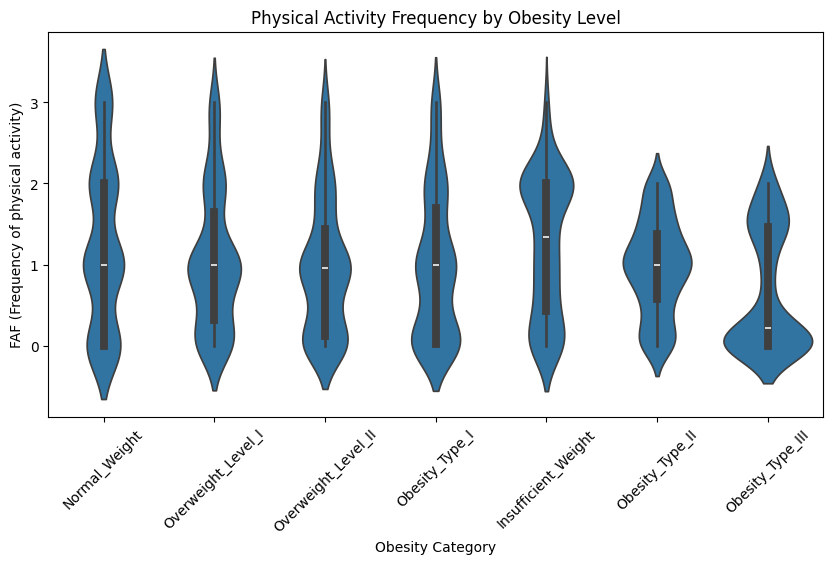

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x="NObeyesdad", y="FAF")
plt.xticks(rotation=45)
plt.title("Physical Activity Frequency by Obesity Level")
plt.xlabel("Obesity Category")
plt.ylabel("FAF (Frequency of physical activity)")
plt.show()

In [ ]:
contingency_table = pd.crosstab(df["family_history_with_overweight"], df["NObeyesdad"])
chi2, p_chi2, dof, expected = chi2_contingency(contingency_table)
grouped_bmi = [group["BMI"].values for name, group in df.groupby("NObeyesdad")]
f_stat, p_anova = f_oneway(*grouped_bmi)

print(f"Chi-Square p-value: {p_chi2}")
print("Conclusion:", "Dependent" if p_chi2 < 0.05 else "Independent")
print(f"ANOVA p-value: {p_anova}")
print("Conclusion:", "Means differ" if p_anova < 0.05 else "Means same")

Chi-Square p-value: 4.2280167944705074e-131
Conclusion: Dependent
ANOVA p-value: 0.0
Conclusion: Means differ
